In [1]:
# Load CSV
import pandas as pd
import numpy as np

filename = 'ex2data1.csv'
data = pd.read_csv(filename)

feature_names = data.columns.values
target_names = data['Admission'].astype('category').cat.categories

print(data.dtypes)
#pd.options.display.max_rows=100
data

Exam 1       float64
Exam 2       float64
Admission      int64
dtype: object


,Exam 1,Exam 2,Admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [2]:
X = data[['Exam 1', 'Exam 2']].values   #Feature Matrix
y = data['Admission'].values     #Target vector

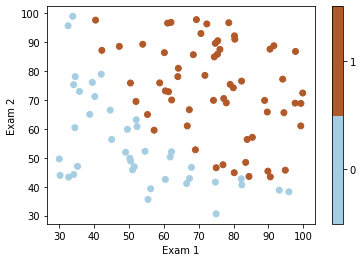

In [4]:
import matplotlib.pyplot as plt

x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: target_names[int(i)])
plt.scatter(X[:, x_index], X[:, y_index], c=y, cmap=plt.cm.get_cmap('Paired', 2))
plt.colorbar(ticks=[0, 1], format=formatter)
plt.clim(-0.5, 1.5)
plt.xlabel(feature_names[x_index])
plt.ylabel(feature_names[y_index]);
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression

# Logistic regression
model = LogisticRegression(solver='liblinear', tol=1e-6, max_iter=int(1e6))
model.fit(X, y)    

X_test = [[45, 55],]
y_forecast = model.predict(X_test).astype(int)

print("Exams:", X_test[0], "=>",  y_forecast)

Exams: [45, 55] => [0]


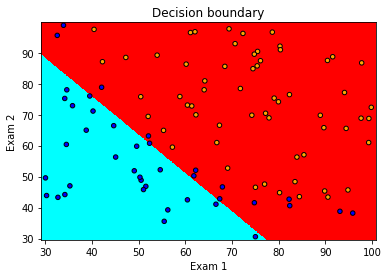

In [8]:
from matplotlib.colors import ListedColormap

h = 0.1  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['cyan', 'red'])
cmap_bold = ListedColormap(['blue', 'orange'])

# Get '1: Lifetime' and '2: Country' attributes only 
x_index = 0
y_index = 1

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, x_index].min() - 1, X[:, x_index].max() + 1
y_min, y_max = X[:, y_index].min() - 1, X[:, y_index].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, x_index], X[:, y_index], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision boundary")
plt.xlabel(feature_names[x_index])
plt.ylabel(feature_names[y_index]);

plt.show()
